# Results on plants MADS ChIP-seq data using JASPAR2014 binding profiles for ChIP'ed TFs with dinucleotide-matched background regions

## Data sets

In [1]:
%config InlineBackend.figure_formats=['svg']
%matplotlib inline
from matplotlib.pyplot import savefig

In [2]:
def auc_val(inline):
    return eval(inline.split(' ')[-1])

import os
import pandas as pd
datasets = ['AGL-15', 'AP3', 'FLC', 'PI', 'SEP3', 'SOC1', 'SVP']
data = pd.DataFrame(index=datasets, columns=['TFFM_dnashape_AUROC', 'TFFM_AUROC',
                                             'PSSM_dnashape_AUROC', 'PSSM_AUROC',
                                             'TFFM_dnashape_AUPRC', 'TFFM_AUPRC',
                                             'PSSM_dnashape_AUPRC', 'PSSM_AUPRC'])
rep = '20160522_JasparDinucMatchedPlantsMadsScaledDnashape2ndOrderDimo'
for repo in os.listdir(rep):
    if repo in datasets:
        res_file = '{0}/{1}/predictions_results.txt'.format(rep, repo)
        if os.path.isfile(res_file):
            with open(res_file) as stream:
                first_line = stream.readline()
                assert first_line.startswith('ROC AUC TFFM+DNAshape')
                data.loc[repo, 'TFFM_dnashape_AUROC'] = auc_val(first_line)
                second_line = stream.readline()
                assert second_line.startswith('PR AUC TFFM+DNAshape')
                data.loc[repo, 'TFFM_dnashape_AUPRC'] = auc_val(second_line)
                third_line = stream.readline()
                assert third_line.startswith('ROC AUC TFFM')
                data.loc[repo, 'TFFM_AUROC'] = auc_val(third_line)
                fourth_line = stream.readline()
                assert fourth_line.startswith('PR AUC TFFM')
                data.loc[repo, 'TFFM_AUPRC'] = auc_val(fourth_line)
                fifth_line = stream.readline()
                assert fifth_line.startswith('ROC AUC PWM+DNAshape')
                data.loc[repo, 'PSSM_dnashape_AUROC'] = auc_val(fifth_line)
                sixth_line = stream.readline()
                assert sixth_line.startswith('PR AUC PWM+DNAshape')
                data.loc[repo, 'PSSM_dnashape_AUPRC'] = auc_val(sixth_line)
                seventh_line = stream.readline()
                assert seventh_line.startswith('ROC AUC PWM')
                data.loc[repo, 'PSSM_AUROC'] = auc_val(seventh_line)
                eighth_line = stream.readline()
                assert eighth_line.startswith('PR AUC PWM')
                data.loc[repo, 'PSSM_AUPRC'] = auc_val(eighth_line)
                data.loc[repo, 'TFFM_AUROC_improvement'] = (
                    data.loc[repo, 'TFFM_dnashape_AUROC'] - data.loc[repo, 'TFFM_AUROC'])
                data.loc[repo, 'TFFM_AUPRC_improvement'] = (
                    data.loc[repo, 'TFFM_dnashape_AUPRC'] - data.loc[repo, 'TFFM_AUPRC'])
                data.loc[repo, 'PSSM_AUROC_improvement'] = (
                    data.loc[repo, 'PSSM_dnashape_AUROC'] - data.loc[repo, 'PSSM_AUROC'])
                data.loc[repo, 'PSSM_AUPRC_improvement'] = (
                    data.loc[repo, 'PSSM_dnashape_AUPRC'] - data.loc[repo, 'PSSM_AUPRC'])

In [3]:
rep = '20160522_JasparDinucMatchedPlantsMads1merScaledDnashape2ndOrderDimoGradboost'
for repo in os.listdir(rep):
    if repo in datasets:
        res_file = '{0}/{1}/predictions_results.txt'.format(rep, repo)
        if os.path.isfile(res_file):
            with open(res_file) as stream:
                first_line = stream.readline()
                assert first_line.startswith('ROC AUC 1mer+DNAshape')
                data.loc[repo, '4bits_dnashape_AUROC'] = auc_val(first_line)
                second_line = stream.readline()
                assert second_line.startswith('PR AUC 1mer+DNAshape')
                data.loc[repo, '4bits_dnashape_AUPRC'] = auc_val(second_line)
                third_line = stream.readline()
                assert third_line.startswith('ROC AUC 1mer')
                data.loc[repo, '4bits_AUROC'] = auc_val(third_line)
                fourth_line = stream.readline()
                assert fourth_line.startswith('PR AUC 1mer')
                data.loc[repo, '4bits_AUPRC'] = auc_val(fourth_line)
                data.loc[repo, '4bits_AUROC_improvement'] = (
                    data.loc[repo,'4bits_dnashape_AUROC'] - data.loc[repo, '4bits_AUROC'])
                data.loc[repo, '4bits_AUPRC_improvement'] = (
                    data.loc[repo, '4bits_dnashape_AUPRC'] - data.loc[repo, '4bits_AUPRC'])

## TFFM analyses

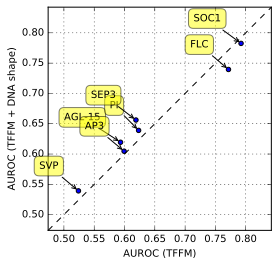

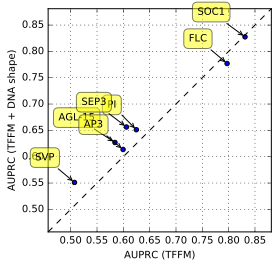

In [4]:
mini = min(min(data["TFFM_AUROC"]), min(data["TFFM_dnashape_AUROC"])) - 0.05
maxi = max(max(data["TFFM_AUROC"]), max(data["TFFM_dnashape_AUROC"])) + 0.05
axes = data.dropna().plot(x="TFFM_AUROC", y="TFFM_dnashape_AUROC", kind="scatter")
axes.set_xlabel("AUROC (TFFM)")
axes.set_ylabel("AUROC (TFFM + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
for label, xpos, ypos in zip(data.index, data.TFFM_AUROC, data.TFFM_dnashape_AUROC):
    axes.annotate(label, xy=(xpos, ypos), xytext=(-20, 20), textcoords = 'offset points',
                  ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round,pad=0.5',
                                                           fc = 'yellow', alpha = 0.5),
                  arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
savefig("AUROC_TFFM_TFFM+DNAshape.svg")

# Figure needs post-processing using inkscape for removing overlapping labels
mini = min(min(data["TFFM_AUPRC"]), min(data["TFFM_dnashape_AUPRC"])) - 0.05
maxi = max(max(data["TFFM_AUPRC"]), max(data["TFFM_dnashape_AUPRC"])) + 0.05
axes = data.dropna().plot(x="TFFM_AUPRC", y="TFFM_dnashape_AUPRC", kind="scatter")
axes.set_xlabel("AUPRC (TFFM)")
axes.set_ylabel("AUPRC (TFFM + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
for label, xpos, ypos in zip(data.index, data.TFFM_AUPRC, data.TFFM_dnashape_AUPRC):
    axes.annotate(label, xy=(xpos, ypos), xytext=(-20, 20), textcoords = 'offset points',
                  ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round,pad=0.5',
                                                           fc = 'yellow', alpha = 0.5),
                  arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
savefig("AUPRC_TFFM_TFFM+DNAshape.svg")
# Figure needs post-processing using inkscape for removing overlapping labels

## PSSM analyses

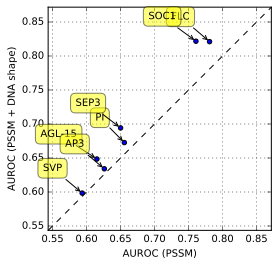

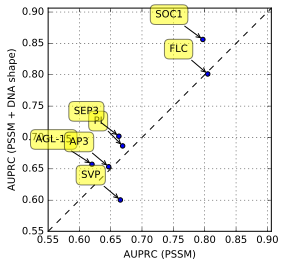

In [5]:
mini = min(min(data["PSSM_AUROC"]), min(data["PSSM_dnashape_AUROC"])) - 0.05
maxi = max(max(data["PSSM_AUROC"]), max(data["PSSM_dnashape_AUROC"])) + 0.05
axes = data.dropna().plot(x="PSSM_AUROC", y="PSSM_dnashape_AUROC", kind="scatter")
axes.set_xlabel("AUROC (PSSM)")
axes.set_ylabel("AUROC (PSSM + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
for label, xpos, ypos in zip(data.index, data.PSSM_AUROC, data.PSSM_dnashape_AUROC):
    axes.annotate(label, xy=(xpos, ypos), xytext=(-20, 20), textcoords = 'offset points',
                  ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round,pad=0.5',
                                                           fc = 'yellow', alpha = 0.5),
                  arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
savefig("AUROC_PSSM_PSSM+DNAshape.svg")

# Figure needs post-processing using inkscape for removing overlapping labels
mini = min(min(data["PSSM_AUPRC"]), min(data["PSSM_dnashape_AUPRC"])) - 0.05
maxi = max(max(data["PSSM_AUPRC"]), max(data["PSSM_dnashape_AUPRC"])) + 0.05
axes = data.dropna().plot(x="PSSM_AUPRC", y="PSSM_dnashape_AUPRC", kind="scatter")
axes.set_xlabel("AUPRC (PSSM)")
axes.set_ylabel("AUPRC (PSSM + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
for label, xpos, ypos in zip(data.index, data.PSSM_AUPRC, data.PSSM_dnashape_AUPRC):
    axes.annotate(label, xy=(xpos, ypos), xytext=(-20, 20), textcoords = 'offset points',
                  ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round,pad=0.5',
                                                           fc = 'yellow', alpha = 0.5),
                  arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
savefig("AUPRC_PSSM_PSSM+DNAshape.svg")
# Figure needs post-processing using inkscape for removing overlapping labels

## 4-bits analyses

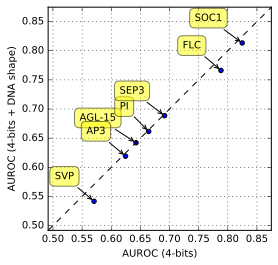

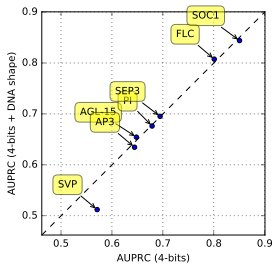

In [6]:
mini = min(min(data["4bits_AUROC"]), min(data["4bits_dnashape_AUROC"])) - 0.05
maxi = max(max(data["4bits_AUROC"]), max(data["4bits_dnashape_AUROC"])) + 0.05
axes = data.dropna().plot(x="4bits_AUROC", y="4bits_dnashape_AUROC", kind="scatter")
axes.set_xlabel("AUROC (4-bits)")
axes.set_ylabel("AUROC (4-bits + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
for label, xpos, ypos in zip(data.index, data['4bits_AUROC'],
                             data['4bits_dnashape_AUROC']):
    axes.annotate(label, xy=(xpos, ypos), xytext=(-20, 20), textcoords = 'offset points',
                  ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round,pad=0.5',
                                                           fc = 'yellow', alpha = 0.5),
                  arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
savefig("AUROC_1mer_1mer+DNAshape.svg")

# Figure needs post-processing using inkscape for removing overlapping labels
mini = min(min(data["4bits_AUPRC"]), min(data["4bits_dnashape_AUPRC"])) - 0.05
maxi = max(max(data["4bits_AUPRC"]), max(data["4bits_dnashape_AUPRC"])) + 0.05
axes = data.dropna().plot(x="4bits_AUPRC", y="4bits_dnashape_AUPRC", kind="scatter")
axes.set_xlabel("AUPRC (4-bits)")
axes.set_ylabel("AUPRC (4-bits + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
for label, xpos, ypos in zip(data.index, data['4bits_AUPRC'],
                             data['4bits_dnashape_AUPRC']):
    axes.annotate(label, xy=(xpos, ypos), xytext=(-20, 20), textcoords = 'offset points',
                  ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round,pad=0.5',
                                                           fc = 'yellow', alpha = 0.5),
                  arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
savefig("AUPRC_1mer_1mer+DNAshape.svg")
# Figure needs post-processing using inkscape for removing overlapping labels